In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [2]:
df = pd.read_csv('crit_pt.csv')

In [3]:
df = df[df.d==2]

In [ ]:
df['']

Experimented with function $v(\phi):=(\phi-\pi/2)^d$

In [7]:
df['grad_normalized'] = df.normalized_grad

,Unnamed: 0,Unnamed: 0.1,d,eps,loss,npoint,uq,zk,ud_p,e_val,normalized_grad
21,21,21,2,0.0000,-0.365584,16,0.019385,3.846108,0.104832,14.792547,5.407916
22,22,22,2,0.0000,-0.365584,64,0.009746,3.832505,0.052336,14.688098,5.369734
23,23,23,2,0.0000,-0.365584,256,0.004966,3.831755,0.026657,14.682343,5.367630
24,24,24,2,0.0050,-0.365580,16,0.019190,3.839789,0.103435,14.743979,5.390101
25,25,25,2,0.0050,-0.365580,64,0.009764,3.826346,0.052263,14.640925,5.352430
26,26,26,2,0.0050,-0.365580,256,0.004989,3.825604,0.026694,14.635246,5.350355
27,27,27,2,0.0010,-0.365584,16,0.019229,3.844840,0.103919,14.782791,5.404347
28,28,28,2,0.0010,-0.365584,64,0.009815,3.831269,0.052669,14.678623,5.366267
29,29,29,2,0.0010,-0.365584,256,0.004924,3.830520,0.026411,14.672883,5.364172
30,30,30,2,0.0005,-0.365584,16,0.018468,3.845474,0.099841,14.787667,5.406131


In [23]:
#computes the derivative using centered diff

h = 5e-3
n = 16
targ = 'loss'

rh = df[(df.npoint==n)&(df.eps==h)][targ].item()
lh = df[(df.npoint==n)&(df.eps==-h)][targ].item()

res = (rh - lh) / (2*h)
print(res)

-7.965774617701982e-06


When $d=2$, $F(v) = \frac{1}{24} \pi  \left(\pi ^2-6\right) = 0.5065300316150443$.
Recall that $\partial_\Omega\lambda\approx \Xi F(v) = 18.69366561619284 \; F(v) =$

In [37]:
18.69366561619284*0.5065300316150443

9.468903035571225

n=16:-9.7674820540788687 at h=0.0050000000000000
n=64:-9.4855820004557501 at h=0.0050000000000000
n=256:-9.4702918315412887 at h=0.0050000000000000


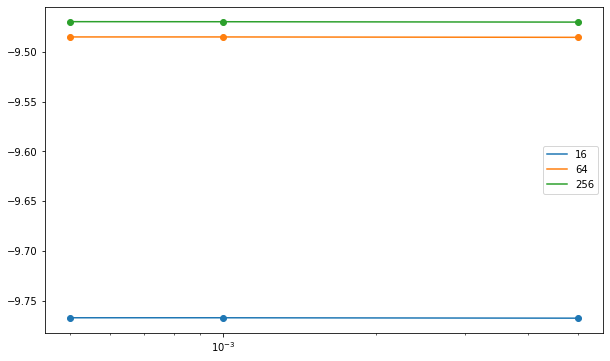

In [44]:
targ = 'e_val'
ns = [16, 64, 256]
plt.figure(figsize = (10, 6))
show = 0

for n in ns:
    hs = [5e-3, 1e-3, 5e-4]
    res = [0] * len(hs)

    for i,h in enumerate(hs):
        rh = df[(df.npoint==n)&(df.eps==h)][targ].item()
        lh = df[(df.npoint==n)&(df.eps==-h)][targ].item()

        res[i] = (rh - lh) / (2*h)

    plt.scatter(hs, res)
    plt.plot(hs, res, label = str(n))
    
    print('n=%d:%.16f at h=%.16f'%(n,res[show],hs[show]))

plt.legend()
plt.xscale('log')


$\partial_\Omega(g/n)=?\frac{g_1}{n_0} = F(v)\;1.428606389580631/0.3569362209506843 = $

In [1]:
0.5065300316150443 * 1.428606389580631/0.3569362209506843

2.0273426937517534

n=16:-3.5706734491203207 at h=0.0010000000000000
n=64:-3.4676726820013215 at h=0.0010000000000000
n=256:-3.4609229180766476 at h=0.0010000000000000


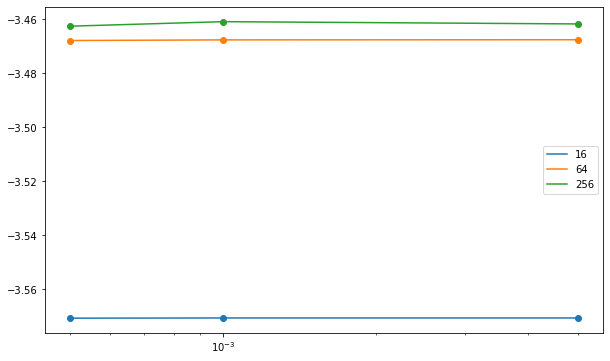

In [5]:
targ = 'normalized_grad'
ns = [16, 64, 256]
plt.figure(figsize = (10, 6))
show = 1

for n in ns:
    hs = [5e-3, 1e-3, 5e-4]
    res = [0] * len(hs)

    for i,h in enumerate(hs):
        rh = df[(df.npoint==n)&(df.eps==h)][targ].item()
        lh = df[(df.npoint==n)&(df.eps==-h)][targ].item()

        res[i] = (rh - lh) / (2*h)

    plt.scatter(hs, res)
    plt.plot(hs, res, label = str(n))
    
    print('n=%d:%.16f at h=%.16f'%(n,res[show],hs[show]))

plt.legend()
plt.xscale('log')


n=16:0.0449814248755006 at h=0.0010000000000000
n=64:0.0420361139769993 at h=0.0010000000000000
n=256:-0.0168919007985002 at h=0.0010000000000000


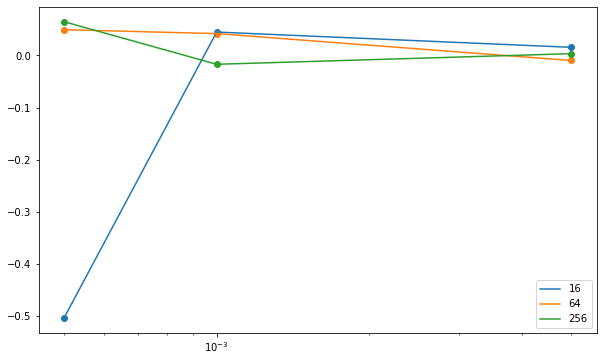

In [48]:
targ = 'uq'
ns = [16, 64, 256]
plt.figure(figsize = (10, 6))
show = 1

for n in ns:
    hs = [5e-3, 1e-3, 5e-4]
    res = [0] * len(hs)

    for i,h in enumerate(hs):
        rh = df[(df.npoint==n)&(df.eps==h)][targ].item()
        lh = df[(df.npoint==n)&(df.eps==-h)][targ].item()

        res[i] = (rh - lh) / (2*h)

    plt.scatter(hs, res)
    plt.plot(hs, res, label = str(n))
    
    print('n=%d:%.16f at h=%.16f'%(n,res[show],hs[show]))

plt.legend()
plt.xscale('log')


gradient term: $1.428606389580631 F(v)$

$g_1/n_0$ = $1.428606389580631 F(v)/0.3569362209506843 = 4.002413612649339F(v)$

In [51]:
1.428606389580631*0.5065300316150443

0.7236320396797312

In [58]:
1.428606389580631*0.5065300316150443*0.013913928543466346

0.010068564491866584

n=16:0.1747564593555032 at h=0.0010000000000000
n=64:0.1918339156440005 at h=0.0010000000000000
n=256:-0.1077679071440005 at h=0.0010000000000000


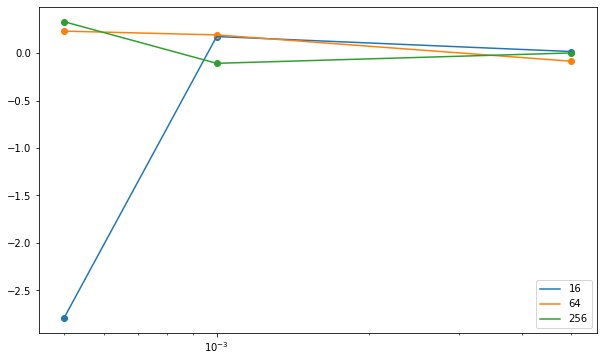

In [49]:
targ = 'ud_p'
ns = [16, 64, 256]
plt.figure(figsize = (10, 6))
show = 1

for n in ns:
    hs = [5e-3, 1e-3, 5e-4]
    res = [0] * len(hs)

    for i,h in enumerate(hs):
        rh = df[(df.npoint==n)&(df.eps==h)][targ].item()
        lh = df[(df.npoint==n)&(df.eps==-h)][targ].item()

        res[i] = (rh - lh) / (2*h)

    plt.scatter(hs, res)
    plt.plot(hs, res, label = str(n))
    
    print('n=%d:%.16f at h=%.16f'%(n,res[show],hs[show]))

plt.legend()
plt.xscale('log')


n=16:-0.0000079657746177 at h=0.0050000000000000
n=64:-0.0000085785102910 at h=0.0050000000000000
n=256:-0.0000264522161897 at h=0.0050000000000000


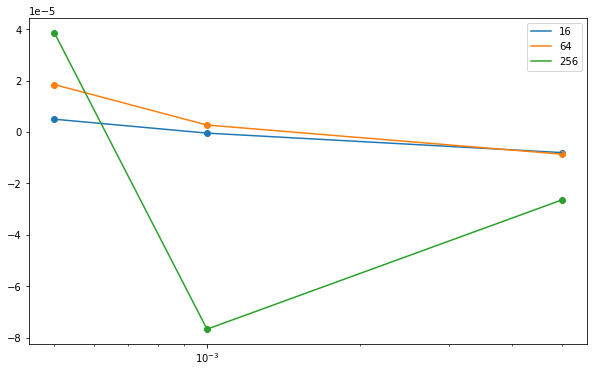

In [52]:
targ = 'loss'
ns = [16, 64, 256]
plt.figure(figsize = (10, 6))
show = 0

for n in ns:
    hs = [5e-3, 1e-3, 5e-4]
    res = [0] * len(hs)

    for i,h in enumerate(hs):
        rh = df[(df.npoint==n)&(df.eps==h)][targ].item()
        lh = df[(df.npoint==n)&(df.eps==-h)][targ].item()

        res[i] = (rh - lh) / (2*h)

    plt.scatter(hs, res)
    plt.plot(hs, res, label = str(n))
    
    print('n=%d:%.16f at h=%.16f'%(n,res[show],hs[show]))

plt.legend()
plt.xscale('log')


In [53]:
df[df.eps==0]

,Unnamed: 0,d,eps,loss,npoint,uq,zk,ud_p,e_val
21,21,2,0.0,-0.365584,16,0.019385,3.846108,0.104832,14.792547
22,22,2,0.0,-0.365584,64,0.009746,3.832505,0.052336,14.688098
23,23,2,0.0,-0.365584,256,0.004966,3.831755,0.026657,14.682343


In [54]:
0.026657/(1.91585)

0.013913928543466346

In [57]:
0.004966/-0.356936

-0.013912858327543314